Write a program to implement recurrent neural network on sunspot dataset .Find out the training and testing accuracy for no of timestep as 5,8

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [65]:
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [66]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = 5

trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [67]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [68]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2,validation_data=(testX, testY))

Epoch 1/20
451/451 - 2s - loss: 0.0176 - val_loss: 0.0148 - 2s/epoch - 5ms/step
Epoch 2/20
451/451 - 1s - loss: 0.0061 - val_loss: 0.0088 - 1s/epoch - 2ms/step
Epoch 3/20
451/451 - 1s - loss: 0.0051 - val_loss: 0.0088 - 948ms/epoch - 2ms/step
Epoch 4/20
451/451 - 1s - loss: 0.0048 - val_loss: 0.0087 - 1s/epoch - 2ms/step
Epoch 5/20
451/451 - 1s - loss: 0.0047 - val_loss: 0.0095 - 940ms/epoch - 2ms/step
Epoch 6/20
451/451 - 1s - loss: 0.0045 - val_loss: 0.0091 - 930ms/epoch - 2ms/step
Epoch 7/20
451/451 - 1s - loss: 0.0044 - val_loss: 0.0123 - 1s/epoch - 2ms/step
Epoch 8/20
451/451 - 1s - loss: 0.0045 - val_loss: 0.0104 - 936ms/epoch - 2ms/step
Epoch 9/20
451/451 - 1s - loss: 0.0043 - val_loss: 0.0091 - 1s/epoch - 3ms/step
Epoch 10/20
451/451 - 2s - loss: 0.0046 - val_loss: 0.0090 - 2s/epoch - 3ms/step
Epoch 11/20
451/451 - 1s - loss: 0.0044 - val_loss: 0.0109 - 1s/epoch - 3ms/step
Epoch 12/20
451/451 - 1s - loss: 0.0044 - val_loss: 0.0093 - 937ms/epoch - 2ms/step
Epoch 13/20
451/451 - 

In [69]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)
trainY.shape,test_predict.shape

4/4 [==============================] - 0s 3ms/step
Train RMSE: 0.064 RMSE
Test RMSE: 0.097 RMSE


((451,), (112, 1))

In [70]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='g')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

In [71]:
time_steps = 8

In [72]:
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [73]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [74]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2,validation_data=(testX, testY))

Epoch 1/20
281/281 - 2s - loss: 0.0125 - val_loss: 0.0286 - 2s/epoch - 6ms/step
Epoch 2/20
281/281 - 1s - loss: 0.0103 - val_loss: 0.0321 - 643ms/epoch - 2ms/step
Epoch 3/20
281/281 - 1s - loss: 0.0092 - val_loss: 0.0240 - 716ms/epoch - 3ms/step
Epoch 4/20
281/281 - 1s - loss: 0.0083 - val_loss: 0.0258 - 662ms/epoch - 2ms/step
Epoch 5/20
281/281 - 1s - loss: 0.0077 - val_loss: 0.0197 - 674ms/epoch - 2ms/step
Epoch 6/20
281/281 - 1s - loss: 0.0071 - val_loss: 0.0197 - 689ms/epoch - 2ms/step
Epoch 7/20
281/281 - 1s - loss: 0.0068 - val_loss: 0.0183 - 941ms/epoch - 3ms/step
Epoch 8/20
281/281 - 1s - loss: 0.0063 - val_loss: 0.0161 - 1s/epoch - 4ms/step
Epoch 9/20
281/281 - 1s - loss: 0.0058 - val_loss: 0.0150 - 982ms/epoch - 3ms/step
Epoch 10/20
281/281 - 1s - loss: 0.0056 - val_loss: 0.0145 - 1s/epoch - 4ms/step
Epoch 11/20
281/281 - 1s - loss: 0.0054 - val_loss: 0.0136 - 888ms/epoch - 3ms/step
Epoch 12/20
281/281 - 1s - loss: 0.0052 - val_loss: 0.0139 - 704ms/epoch - 3ms/step
Epoch 13/2

In [75]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)
trainY.shape,test_predict.shape

3/3 [==============================] - 0s 10ms/step
Train RMSE: 0.066 RMSE
Test RMSE: 0.101 RMSE


((281,), (70, 1))

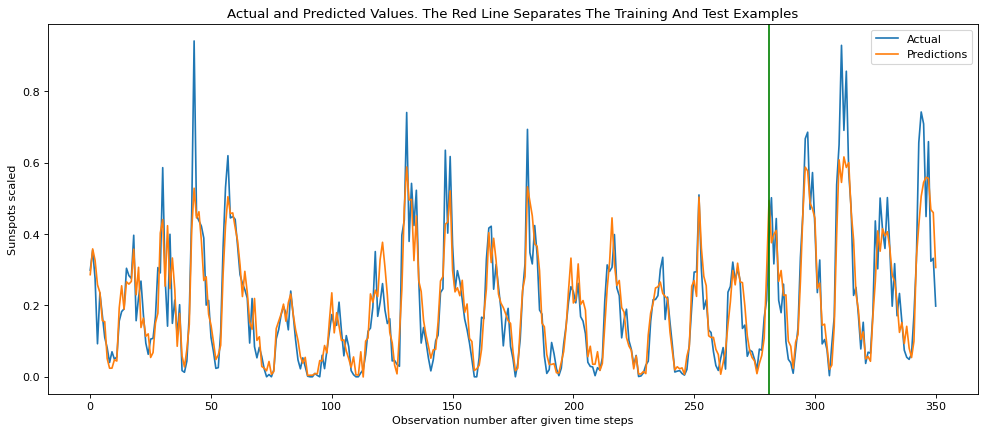

In [77]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='g')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)